After the initial exploratory data analysis with plotting correlations between single variables, attempts to model with linear aggression ran into errors due to NaNs.  I have to look at how to deal with NaNs.

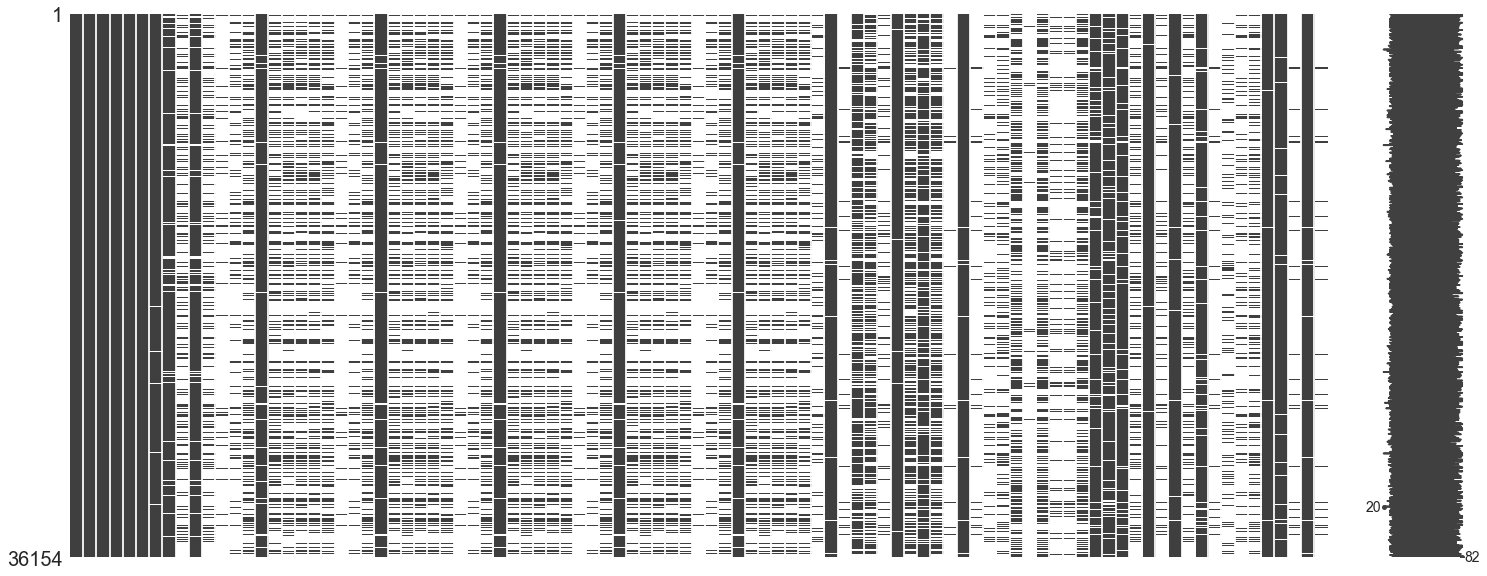

In [1]:
### Found this module to visualize missing data
### This first import dataframe after stansdardized time

from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'df5'
df = pd.read_csv(Location)


import missingno as msno

msno.matrix(df.sample(36154))

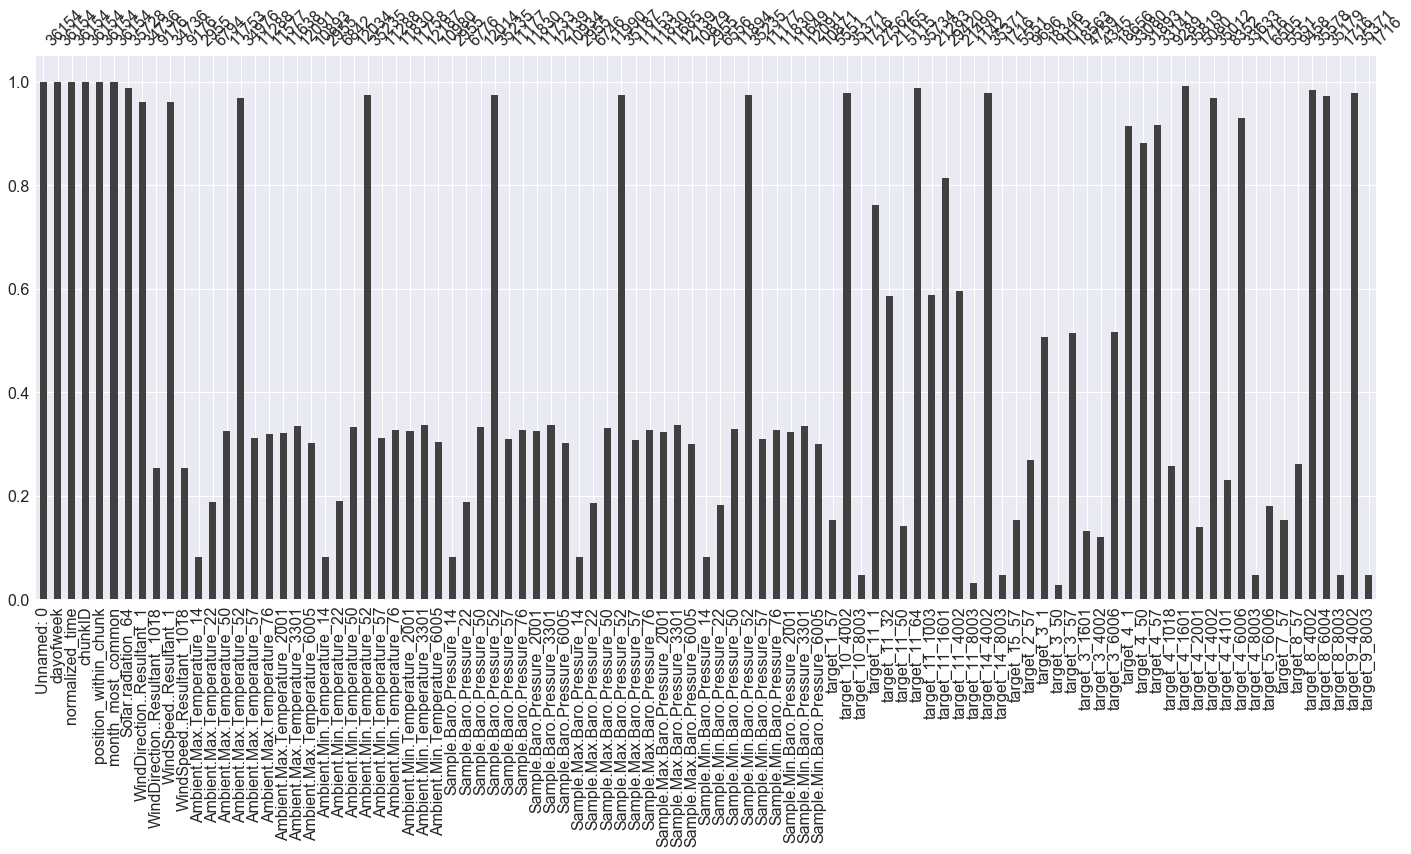

In [2]:
msno.bar(df.sample(36154))  ##Bar graph to show percentage of non-NaN data

In [3]:
df.head()

,Unnamed: 0,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,0,6,165,1,1,10,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,1,6,166,1,2,10,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,2,6,167,1,3,10,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,3,0,168,1,4,10,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,4,0,169,1,5,10,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [4]:
df1 = df.drop(df.columns[[0]], axis=1)
df1.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,6,165,1,1,10,0.01,117.0,187.0,0.3,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,6,166,1,2,10,0.01,231.0,202.0,0.5,0.6,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,6,167,1,3,10,0.01,247.0,227.0,0.5,1.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,0,168,1,4,10,0.01,219.0,218.0,0.2,1.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,0,169,1,5,10,0.01,2.0,216.0,0.2,0.3,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [5]:
df1.shape

(36154, 94)

In [6]:
print(df1.isnull().sum()) ###Total count of NaN

dayofweek                            0
normalized_time                      0
chunkID                              0
position_within_chunk                0
month_most_common                    0
Solar.radiation_64                 426
WindDirection..Resultant_1        1418
WindDirection..Resultant_1018    26978
WindSpeed..Resultant_1            1418
WindSpeed..Resultant_1018        26978
Ambient.Max.Temperature_14       33199
Ambient.Max.Temperature_22       29360
Ambient.Max.Temperature_50       24401
Ambient.Max.Temperature_52        1178
Ambient.Max.Temperature_57       24866
Ambient.Max.Temperature_76       24577
Ambient.Max.Temperature_2001     24516
Ambient.Max.Temperature_3301     24063
Ambient.Max.Temperature_6005     25261
Ambient.Min.Temperature_14       33199
Ambient.Min.Temperature_22       29312
Ambient.Min.Temperature_50       24120
Ambient.Min.Temperature_52         919
Ambient.Min.Temperature_57       24866
Ambient.Min.Temperature_76       24324
Ambient.Min.Temperature_2

In [7]:
df2 = df1.copy()

In [8]:
df2.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,6,165,1,1,10,0.01,117.0,187.0,0.3,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,6,166,1,2,10,0.01,231.0,202.0,0.5,0.6,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,6,167,1,3,10,0.01,247.0,227.0,0.5,1.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,0,168,1,4,10,0.01,219.0,218.0,0.2,1.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,0,169,1,5,10,0.01,2.0,216.0,0.2,0.3,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


One way to deal with NaNs is to remove rows with NaN. Here, I remove rows that have less than 30000 non-NaNs.

In [97]:

df2.dropna(axis =1, inplace = True, thresh=30000)
print(df1.shape)
print(df2.shape)
print ('This removed', df1.shape[1]-df2.shape[1], 'columns from the original dataframe.')

(36154, 94)
(36154, 25)
This removed 69 columns from the original dataframe.


In [10]:
df2.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindSpeed..Resultant_1,Ambient.Max.Temperature_52,Ambient.Min.Temperature_52,...,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,6,165,1,1,10,0.01,117.0,0.3,14.9,5.8,...,2.389656,2.843490,0.092022,1.693211,0.184045,0.276067,1.748424,2.138792,3.013752,5.679280
1,6,166,1,2,10,0.01,231.0,0.5,14.9,5.8,...,1.991380,3.101153,0.092022,1.941671,0.184045,0.368089,2.144120,2.722099,3.888712,7.426751
2,6,167,1,3,10,0.01,247.0,0.5,14.9,5.8,...,1.752415,3.064344,0.092022,2.521412,0.184045,0.368089,1.932469,3.110970,3.888712,7.683732
3,0,168,1,4,10,0.01,219.0,0.2,14.0,4.8,...,2.389656,3.211580,0.184045,2.374176,0.184045,0.276067,2.088907,2.041574,3.208188,4.831243
4,0,169,1,5,10,0.01,2.0,0.2,14.0,4.8,...,2.310001,3.671691,0.184045,2.466199,0.184045,0.276067,2.604232,2.138792,3.499841,4.625658


In [11]:
df3 = df2.copy()

In [12]:
df2.shape

(36154, 25)

In [13]:
print(df2.isnull().sum())  # This still leaves many Nan in some of the remaining columns

dayofweek                         0
normalized_time                   0
chunkID                           0
position_within_chunk             0
month_most_common                 0
Solar.radiation_64              426
WindDirection..Resultant_1     1418
WindSpeed..Resultant_1         1418
Ambient.Max.Temperature_52     1178
Ambient.Min.Temperature_52      919
Sample.Baro.Pressure_52         919
Sample.Max.Baro.Pressure_52     967
Sample.Min.Baro.Pressure_52     919
target_10_4002                  783
target_11_64                    420
target_14_4002                  783
target_4_1                     3074
target_4_50                    4261
target_4_57                    3013
target_4_1601                   335
target_4_4002                  1142
target_4_6006                  2521
target_8_4002                   576
target_8_6004                   975
target_9_4002                   783
dtype: int64


# This still leaves many Nan in some of the remaining columns

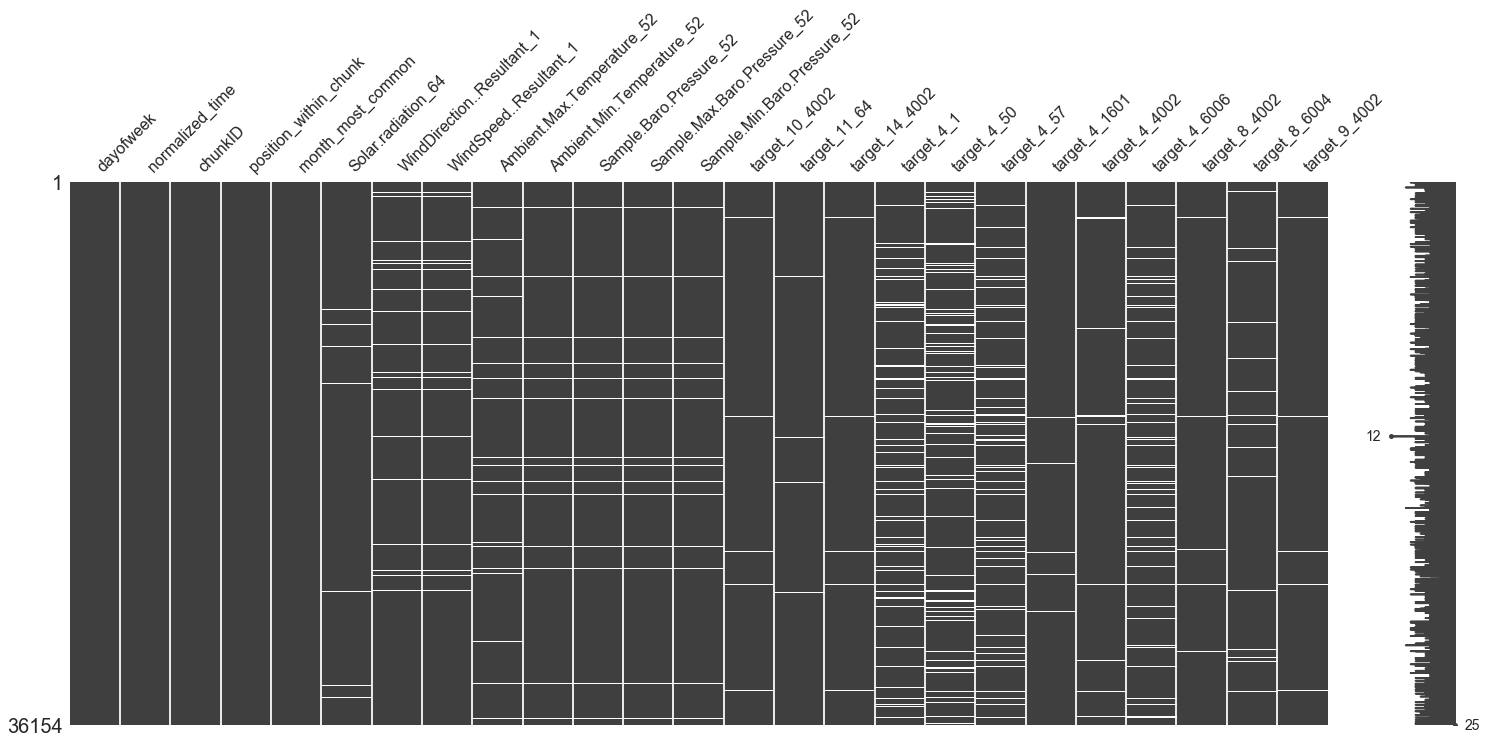

In [15]:
msno.matrix(df2.sample(36154))

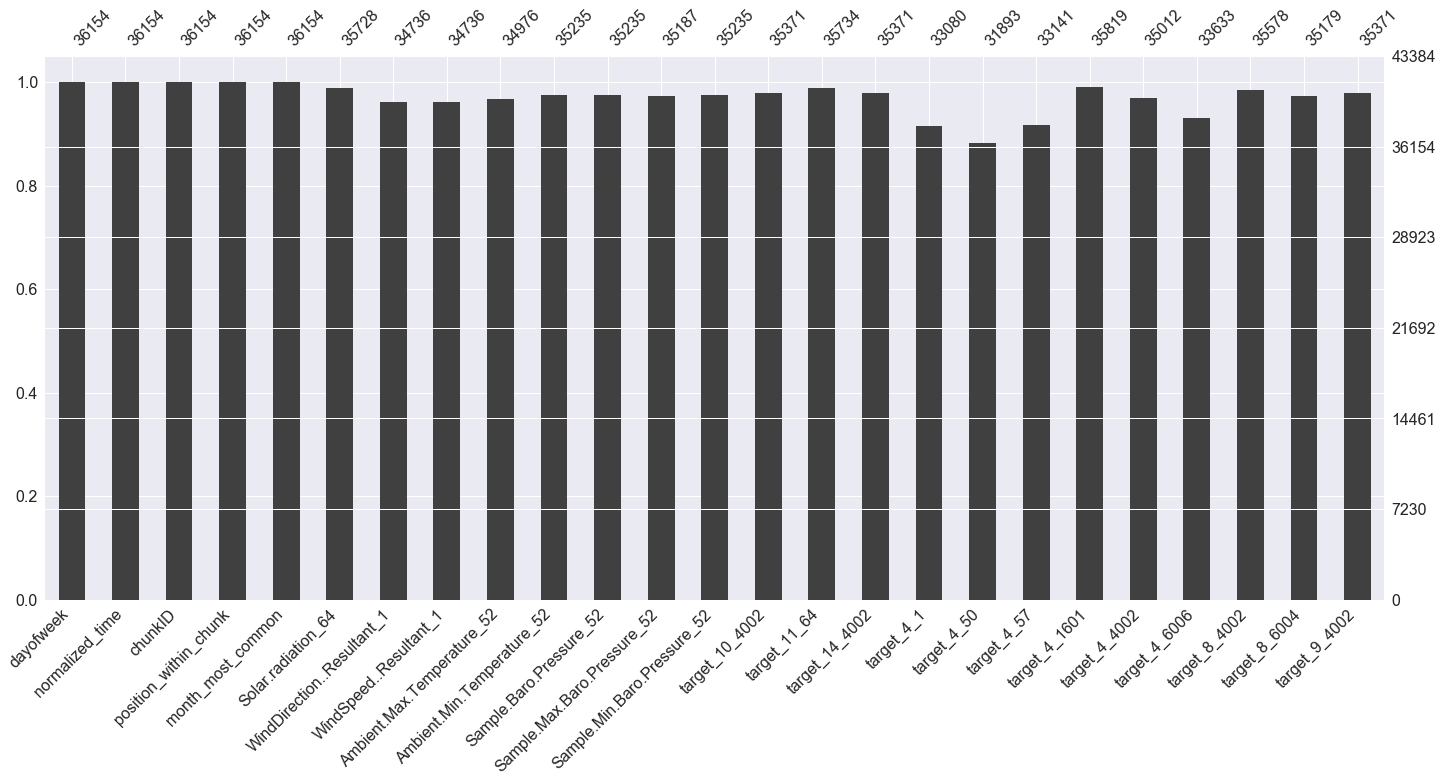

In [16]:
msno.bar(df2.sample(36154))

# Need to remove additional records with NaNs.

In [19]:
df3 = df2.copy()
df3.dropna(axis =0, inplace = True)
print(df3.shape)

(24043, 25)


In [100]:
print ('This removed', df1.shape[0]-df3.shape[0], 'records from the original dataframe.')

This removed 12111 records from the original dataframe.


# I will try to do linear regression for this reduced dataframe.

In [102]:
df3.shape

(24043, 25)

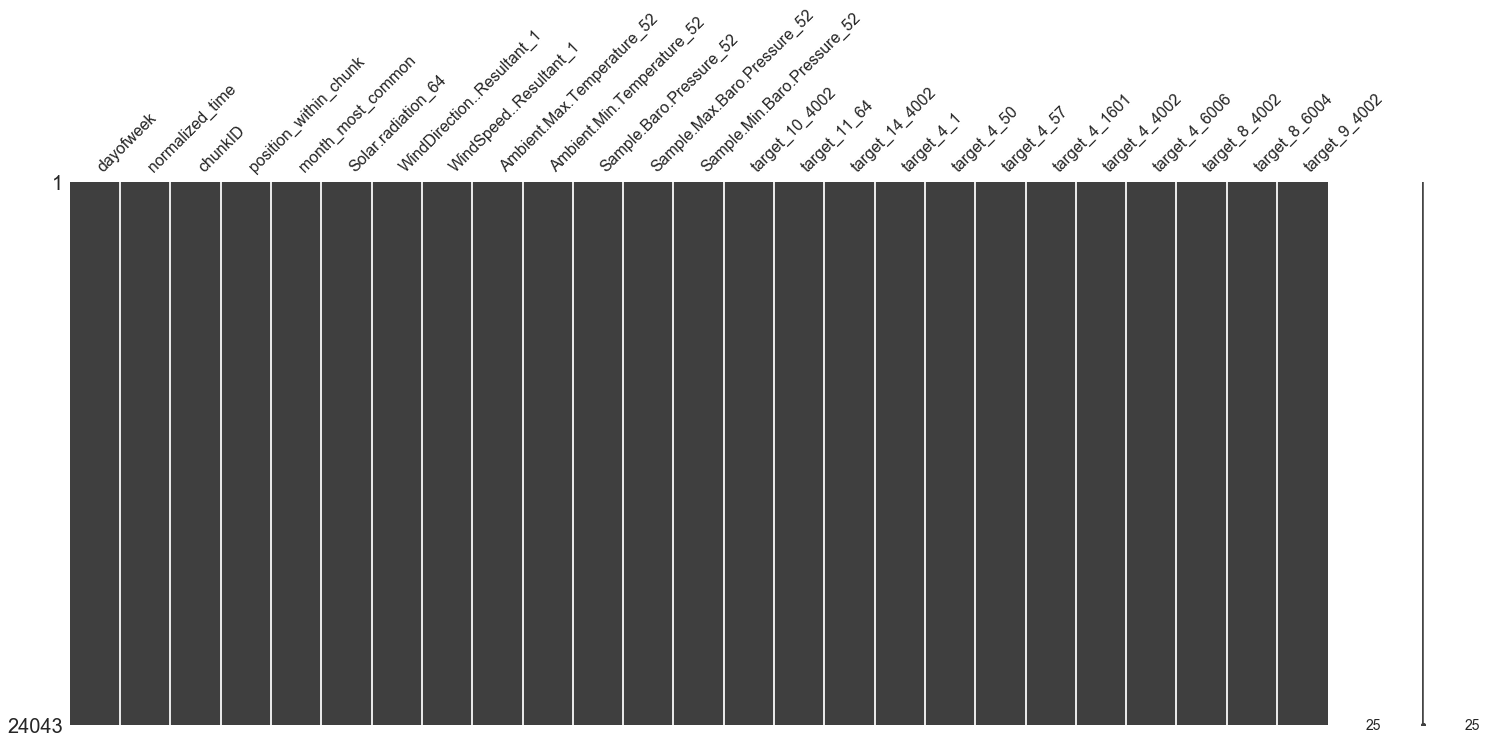

In [26]:
msno.matrix(df3.sample(24043))

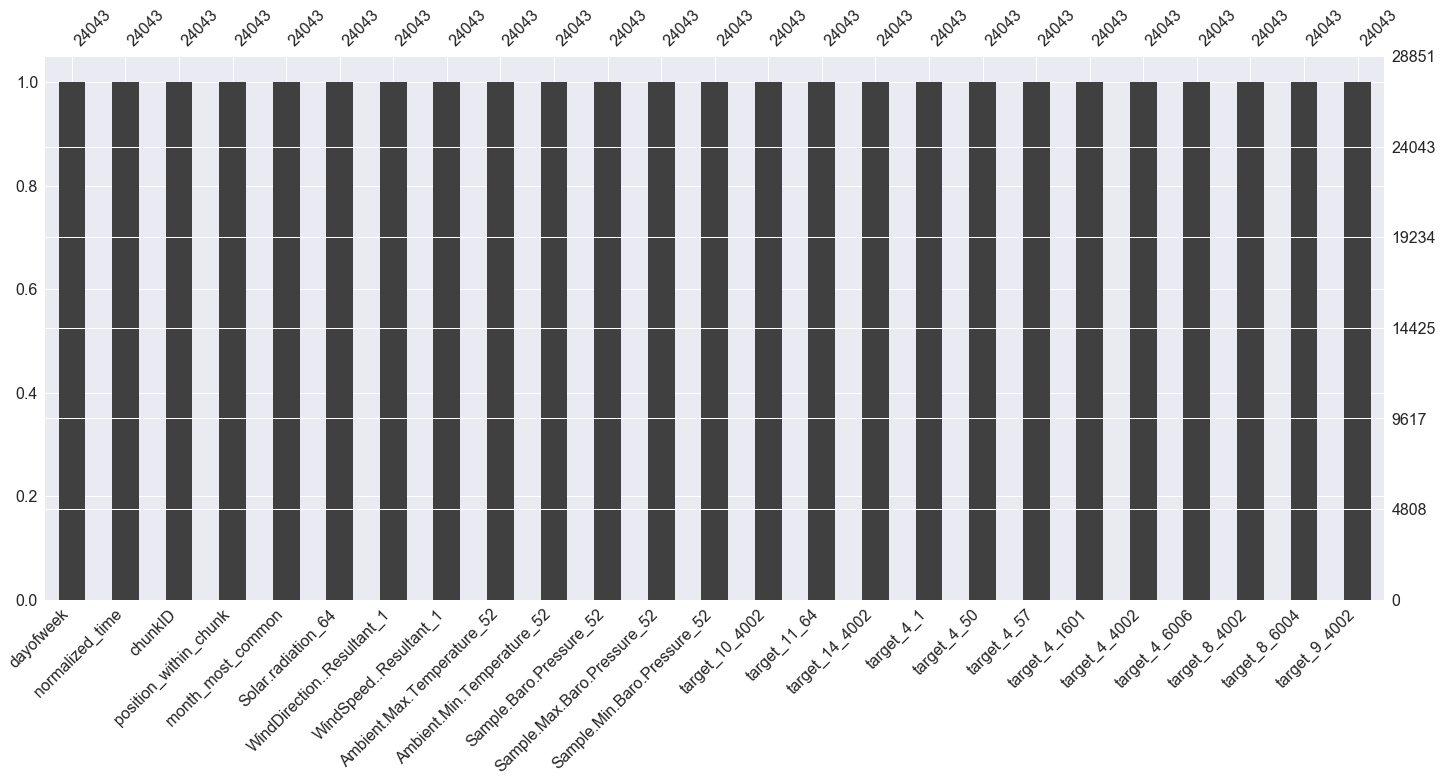

In [27]:
msno.bar(df3.sample(24043))

In [28]:
from pandas import read_csv
import numpy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
values = df3.values
X = values[:,0:12]
y = values[:,12]
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.227633721462


/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


#Split dataframe to independent and dependent, df_input and df_targets, respectively.

In [29]:

df_input = df3.drop(df3.columns[13:25], axis=1)

In [30]:
df_targets = df3.drop(df3.columns[0:13], axis=1)

In [31]:
df_input.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindSpeed..Resultant_1,Ambient.Max.Temperature_52,Ambient.Min.Temperature_52,Sample.Baro.Pressure_52,Sample.Max.Baro.Pressure_52,Sample.Min.Baro.Pressure_52
0,6,165,1,1,10,0.01,117.0,0.3,14.9,5.8,747.0,750.0,743.0
1,6,166,1,2,10,0.01,231.0,0.5,14.9,5.8,747.0,750.0,743.0
2,6,167,1,3,10,0.01,247.0,0.5,14.9,5.8,747.0,750.0,743.0
3,0,168,1,4,10,0.01,219.0,0.2,14.0,4.8,751.0,754.0,748.0
4,0,169,1,5,10,0.01,2.0,0.2,14.0,4.8,751.0,754.0,748.0


In [32]:
df_targets.head()

,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,6.181623,0.114975,2.389656,2.843490,0.092022,1.693211,0.184045,0.276067,1.748424,2.138792,3.013752,5.679280
1,8.475833,0.114975,1.991380,3.101153,0.092022,1.941671,0.184045,0.368089,2.144120,2.722099,3.888712,7.426751
2,8.921930,0.114975,1.752415,3.064344,0.092022,2.521412,0.184045,0.368089,1.932469,3.110970,3.888712,7.683732
3,5.098246,0.114975,2.389656,3.211580,0.184045,2.374176,0.184045,0.276067,2.088907,2.041574,3.208188,4.831243
4,4.875197,0.114975,2.310001,3.671691,0.184045,2.466199,0.184045,0.276067,2.604232,2.138792,3.499841,4.625658


#Test codes for single target:

In [34]:
from sklearn.linear_model import LinearRegression
X = df_input

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lm.fit(X, df_targets.target_10_4002)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,dayofweek,0.022040
1,normalized_time,0.000351
2,chunkID,-0.000277
3,position_within_chunk,-0.000328
4,month_most_common,0.015682
5,Solar.radiation_64,-0.041084
6,WindDirection..Resultant_1,0.000051
7,WindSpeed..Resultant_1,-0.101769
8,Ambient.Max.Temperature_52,0.010400
9,Ambient.Min.Temperature_52,-0.037275


#Estimate Coefficients, intercept, and mse for multiple linear regression for each targets

In [126]:
df_coeff = pd.DataFrame(['dayofweek', 'normalized_time', 'chunkID', 'position_within_chunk',
       'month_most_common', 'Solar.radiation_64', 'WindDirection..Resultant_1',
       'WindSpeed..Resultant_1', 'Ambient.Max.Temperature_52',
       'Ambient.Min.Temperature_52', 'Sample.Baro.Pressure_52',
       'Sample.Max.Baro.Pressure_52', 'Sample.Min.Baro.Pressure_52','intercept','mean square error'], columns = ['features'])

for x in range(len(df_targets.columns)):
    lm.fit(X, df_targets[df_targets.columns[x]])
    mse = np.mean((df_targets[df_targets.columns[x]] - lm.predict(X)) ** 2)
    dat = pd.DataFrame(list(zip(lm.coef_)), columns = [df_targets.columns[x]])
    dat.loc[13] = lm.intercept_
    dat.loc[14] = mse
    df_coeff = df_coeff.join(dat)
print("Estimated Coeffiencts")
df_coeff

Estimated Coeffiencts


,features,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,dayofweek,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,normalized_time,0.022040,-0.018605,0.020733,0.012582,-0.000598,0.012870,0.007304,0.001604,0.017845,-0.001570,0.007124,0.024542
2,chunkID,0.000351,-0.000227,0.000298,0.000900,-0.000148,0.001166,0.000143,-0.000264,0.001839,0.000094,0.000264,0.000420
3,position_within_chunk,-0.000277,0.000391,-0.000347,-0.000734,-0.000052,-0.000302,-0.000295,-0.000227,-0.000379,-0.000136,-0.000333,-0.000306
4,month_most_common,-0.000328,0.000256,-0.000718,-0.001169,0.000073,-0.001650,-0.000163,0.000144,-0.002253,-0.000206,-0.000331,-0.000531
5,Solar.radiation_64,0.015682,-0.037300,-0.024275,-0.042801,-0.002535,-0.044017,-0.004743,0.012405,-0.034551,-0.004785,-0.007987,0.004928
6,WindDirection..Resultant_1,-0.041084,0.715160,-0.852473,-0.153008,0.241641,-0.330146,0.254981,0.121253,-0.337219,-0.041033,-0.126879,-0.308554
7,WindSpeed..Resultant_1,0.000051,-0.001763,-0.000445,-0.000221,0.000140,-0.000125,0.000391,-0.000246,-0.000253,0.000057,-0.000075,-0.000080
8,Ambient.Max.Temperature_52,-0.101769,0.073856,-0.150203,-0.045709,-0.002349,-0.039411,0.005757,0.014691,-0.017413,-0.023181,-0.030022,-0.130856
9,Ambient.Min.Temperature_52,0.010400,0.011722,0.026435,0.000831,0.001507,0.008670,0.011372,0.003359,0.014702,-0.004508,0.002949,0.017047


In [124]:
from pandas.stats.api import ols
import statsmodels.api as sm
X = sm.add_constant(X)
res = sm.OLS(df_targets.target_10_4002,X)
result = res.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         target_10_4002   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     306.9
Date:                Thu, 20 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:32:23   Log-Likelihood:                -29195.
No. Observations:               24043   AIC:                         5.842e+04
Df Residuals:                   24029   BIC:                         5.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

In [125]:
for x in range(len(df_targets.columns)):
    X = sm.add_constant(X)
    res = sm.OLS(df_targets[df_targets.columns[x]],X)
    result = res.fit()
    print(df_targets.columns[x])
    print(result.summary())
    print('*******************************************************')
    

target_10_4002
                            OLS Regression Results                            
Dep. Variable:         target_10_4002   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     306.9
Date:                Thu, 20 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:33:07   Log-Likelihood:                -29195.
No. Observations:               24043   AIC:                         5.842e+04
Df Residuals:                   24029   BIC:                         5.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
con

#Split dataframe to test and training set.

In [67]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, df_targets, test_size=0.2, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(19234, 13)
(4809, 13)
(19234, 12)
(4809, 12)


In [66]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))


Fit a model X_train, and calculate MSE with Y_train: 0.6444088242339789
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.7434160732624502


In [81]:
df_coeff_split = pd.DataFrame(['Training MSE', 'Testing MSE'], columns = ['Mean Standard Error'])

for x in range(len(df_targets.columns)):
    lm.fit(X_train, Y_train[Y_train.columns[x]])
    pred_train = lm.predict(X_train)
    pred_test = lm.predict(X_test)
    mse_train = np.mean((Y_train[Y_train.columns[x]] - lm.predict(X_train)) ** 2)
    mse_test = np.mean((Y_test[Y_test.columns[x]] - lm.predict(X_test)) ** 2)
    col = pd.DataFrame([mse_train, mse_test], columns = [df_targets.columns[x]])

    
    df_coeff_split = df_coeff_split.join(col)
print("MSE_Split")
df_coeff_split

MSE_Split


,Mean Standard Error,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Training MSE,0.644409,0.523635,0.652537,1.038694,0.075218,0.988339,0.397299,0.252228,1.077296,0.084597,0.257715,0.634511
1,Testing MSE,0.743416,0.531597,0.654641,1.108419,0.068369,1.101244,0.492753,0.241431,1.075600,0.081728,0.252056,0.721067


# K Fold Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=4)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score")
df_kfold

KFold Score


,KFolds Score,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.676797,0.534285,0.674853,1.105770,0.075904,1.040663,0.429042,0.253879,1.128857,0.087639,0.264356,0.668118
2,STD,0.162468,0.028888,0.035151,0.099811,0.025545,0.125871,0.105601,0.022251,0.135082,0.020310,0.025695,0.126386


# K Fold Cross Validation with ShuffleSplit

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=10)
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=cv)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score ShuffleSplit")
df_kfold

KFold Score ShuffleSplit


,KFolds Score,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.656442,0.527476,0.648417,1.057076,0.075232,0.986208,0.418575,0.246915,1.045681,0.084784,0.256497,0.641894
2,STD,0.030609,0.004419,0.013758,0.045140,0.003583,0.042906,0.049235,0.015167,0.033174,0.001869,0.002953,0.021599
